# Working with Data APIs

**Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [8]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [9]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [10]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1486062070000,"url":"http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.4","count":224},"features":[{"type":"Feature","properties":{"mag":2.5,"place":"39km WSW of Nikiski, Alaska","time":1486056339547,"updated":1486057096264,"tz":-540,"url":"http://earthquake.usgs.gov/earthquakes/eventpage/ak15191847","detail":"http://earthquake.usgs.gov/earthqu


In [11]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [12]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'properties': {'nst': None, 'magType': 'ml', 'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak15191847.geojson', 'url': 'http://earthquake.usgs.gov/earthquakes/eventpage/ak15191847', 'mmi': None, 'cdi': None, 'ids': ',ak15191847,', 'alert': None, 'dmin': None, 'updated': 1486057096264, 'sources': ',ak,', 'time': 1486056339547, 'tz': -540, 'code': '15191847', 'place': '39km WSW of Nikiski, Alaska', 'title': 'M 2.5 - 39km WSW of Nikiski, Alaska', 'gap': None, 'types': ',geoserve,origin,', 'type': 'earthquake', 'felt': None, 'tsunami': 0, 'rms': 0.64, 'net': 'ak', 'sig': 96, 'status': 'automatic', 'mag': 2.5}, 'id': 'ak15191847', 'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-151.993, 60.6067, 87.5]}}


In [13]:
# print it more clearly

pp.pprint(quakes[32]['geometry'])
pp.pprint(quakes[32]['properties'])

{'coordinates': [162.008, -11.01, 46.51], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '20008fsp',
 'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us20008fsp.geojson',
 'dmin': 2.559,
 'felt': None,
 'gap': 129,
 'ids': ',us20008fsp,',
 'mag': 4.6,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '62km S of Kirakira, Solomon Islands',
 'rms': 0.95,
 'sig': 326,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1485965814290,
 'title': 'M 4.6 - 62km S of Kirakira, Solomon Islands',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': 660,
 'updated': 1486009752040,
 'url': 'http://earthquake.usgs.gov/earthquakes/eventpage/us20008fsp'}


In [14]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.5 - 39km WSW of Nikiski, Alaska
M 2.5 - 62km W of Anchor Point, Alaska
M 3.6 - 20km NNW of Loiza, Puerto Rico
M 4.9 - Kermadec Islands region
M 2.9 - 29km SW of Redoubt Volcano, Alaska
M 4.4 - 36km E of Farkhar, Afghanistan
M 3.2 - 74km N of Charlotte Amalie, U.S. Virgin Islands
M 3.9 - 85km ENE of Chirikof Island, Alaska
M 4.9 - 183km NNE of Banjar Sidayu, Indonesia
M 4.8 - 55km NNW of Agrihan, Northern Mariana Islands
M 2.9 - 20km W of Perry, Oklahoma
M 4.4 - 200km SW of L'Esperance Rock, New Zealand
M 4.7 - 174km WSW of Kuripan, Indonesia
M 5.2 - 47km E of Opotiki, New Zealand
M 4.0 - 14km SSE of Chancay, Peru
M 3.1 - 95km W of Willow, Alaska
M 2.8 - 22km NNW of Fritz Creek, Alaska
M 3.3 - 20km W of Perry, Oklahoma
M 4.8 - 20km ESE of Petatlan, Mexico
M 4.5 - 33km E of Junlian, China
M 5.3 - 264km NNE of Fais, Micronesia
M 4.7 - 135km SSW of Hihifo, Tonga
M 3.6 - 4km NE of Aljubarrota, Portugal
M 4.5 - 132km N of Lae, Papua New Guinea
M 4.4 - 130km WSW of Kota Ternate, Indonesia

In [11]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

226


In [15]:
# pull out lats and longs into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'latitude': [q['geometry']['coordinates'][0] for q in quakes],
     'longtiude': [q['geometry']['coordinates'][1] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

224


In [51]:
# print the first few lines of data

print(df.head())

   latitude  longtiude
0 -151.9930    60.6067
1 -152.9527    59.7842
2  -65.9540    18.6070
3 -175.9863   -27.0828
4 -153.4994    60.1192


In [53]:
# print some descriptive statistics

print(df.describe())

         latitude   longtiude
count  226.000000  226.000000
mean   -41.172917   20.988776
std    112.653000   30.116693
min   -179.735500  -58.039100
25%   -134.143775   -4.303675
50%    -70.180000   19.436650
75%     69.189500   40.318000
max    179.615500   68.275800


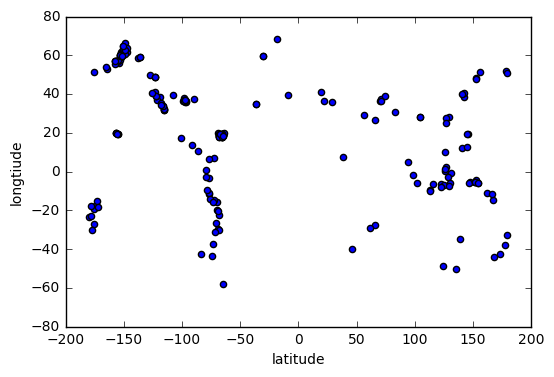

In [17]:
# plot the depth vs. magnitude

df.plot(x='latitude', y='longtiude', kind='scatter')

In [17]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [18]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   depth  magnitude
0   87.5        2.5
1   97.6        2.5
2   75.0        3.6
3   10.0        4.9
4  170.0        2.9


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [19]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [22]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'uky young library'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=uky+young+library


In [23]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'status': 'OK', 'results': [{'address_components': [{'short_name': '401', 'long_name': '401', 'types': ['street_number']}, {'short_name': 'Hilltop Ave', 'long_name': 'Hilltop Avenue', 'types': ['route']}, {'short_name': 'Lexington', 'long_name': 'Lexington', 'types': ['locality', 'political']}, {'short_name': 'Fayette County', 'long_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political']}, {'short_name': 'KY', 'long_name': 'Kentucky', 'types': ['administrative_area_level_1', 'political']}, {'short_name': 'US', 'long_name': 'United States', 'types': ['country', 'political']}, {'short_name': '40506', 'long_name': '40506', 'types': ['postal_code']}, {'short_name': '0001', 'long_name': '0001', 'types': ['postal_code_suffix']}], 'types': ['establishment', 'library', 'point_of_interest'], 'place_id': 'ChIJ4TWVhLhEQogRoRWbSlkOZZY', 'geometry': {'viewport': {'northeast': {'lng': -84.50036891970849, 'lat': 38.0342210802915}, 'southwest': {'lng': -84.5030668802915, 'lat':

In [24]:
# print it more nicely

pp.pprint(data)

{'results': [{'address_components': [{'long_name': '401',
                                      'short_name': '401',
                                      'types': ['street_number']},
                                     {'long_name': 'Hilltop Avenue',
                                      'short_name': 'Hilltop Ave',
                                      'types': ['route']},
                                     {'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Kentucky',
                                      'short_name': 'KY',
               

In [26]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])
    
for r in data['results']:
    coords = r['geometry']['viewport']['northeast']
    print(coords['lat'], coords['lng']) #Get it?

38.0328721 -84.5017179
38.0342210802915 -84.50036891970849


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [27]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [29]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *
consumer_key

'Bv0IwVzDqMTvWwrrDznsltjth'

In [31]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [39]:
# most recent tweet from @UKAthletics's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'ukathletics', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

Game day for @KentuckyWBB vs. No. 4/6 South Carolina. Got your blue picked out? #OneMemorial https://t.co/khkQZaV1JY
Students, we need you there for @KentuckyWBB's Blue Out tomorrow night vs. South Carolina. It's going to be all kin… https://t.co/RbILYPueCH
.@UKCoachStoops preaches "don't flinch" to his team constantly. Turns out his recruits got the message too.

👇… https://t.co/Ig9obHjDs1
You're going to love watching these guys, #BBN. https://t.co/9ydE17JjKl
RT @UKFootball: Watch our Signing Day press conference live at 1 p.m. here --&gt; https://t.co/mfzuyGCXXT


In [40]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Feb 01 17:30:24 +0000 2017',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'bit.ly/2jwjwHa',
                        'expanded_url': 'http://bit.ly/2jwjwHa',
                        'indices': [82, 105],
                        'url': 'https://t.co/mfzuyGCXXT'}],
              'user_mentions': [{'id': 360022514,
                                 'id_str': '360022514',
                                 'indices': [3, 14],
                                 'name': 'Kentucky Football',
                                 'screen_name': 'UKFootball'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 826845165340000257,
 'id_str': '826845165340000257',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place'

### Other API endpoints allow different types of searches

In [41]:
# search for public tweets about #bart

endpoint = 'search/tweets'
params = {
    'q': '#kentuckywildcats', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…

RT @uk_fb_fanly: NSD 2017: Kentucky Wildcats Offensive Signee Bios #KentuckyWildcats  https://t.co/X7vBNANusk https://t.co/SalkHL94qC

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…



In [42]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @BinduBhusal1: @lokendrakumarN @Dhaniklal_Purbe होइन

RT @AghaHayder: Ya Allah tamam momineen ko 13 RAJAB Ka'aba main dekhna naseeb ata farma❤

RT @Sweetemotion_MT: anan Minho &amp; Taemin 1
https://t.co/W8uvVtjVuo
https://t.co/zzaLH4KRi8
https://t.co/pd25qsa9Ta
https://t.co/Fr9cI8v3XI…

RT @AapKaGopalRai: पंजाब में झाड़ू की जीत देख बौखलाई कांग्रेस कैप्टन को-फर्जी लेटर ,फर्जी आरोप ,फर्जी वीडियो का आखरी सहारा। "खिसियानी बिल्…

RT @AzadOffice: हल्का गिद्दड़बाहा में .@SanjayAzadSln की जनसभा में मौजूद हज़ारों लोग https://t.co/JMY9qGWNKF



In [43]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@ronedmondson @DBoggsOWL @yoshinofarmky @WKYT @Houseofgodinc lovehiggins4lex @alarmour14… https://t.co/857XIqcQCh

When your campaign manager is famous. @yoshinofarmky… https://t.co/H57zi0lnNS

@LexingtonForum breakfast: Heroin Epidemic in Our Own Backyard #sharethelex #owenby4lex⚖️ @WKYT… https://t.co/yVYy0LUEGc

Unique late afternoon clouds over Lexington and University of Kentucky #striatedsky… https://t.co/zbxxtqyiae

If you missed us last week were back at it again. Come join us tonight!! Fine Arts 6:15 room… https://t.co/Iih3RaZKq0



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [45]:
endpoint = 'search/tweets'
params = {
    'q': '#Raees',  
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @kamaalrkhan: See @KomalNahta! How much happy coz SRK called him for #Raees success Party. Lol! https://t.co/MTHbcpyNXP

RT @rohitjswl01: #Raees Week 1 ends in Aprx 117cr  TERRIFIC

Wknd 2 will be Aprx 20cr
and 2nd Weekdays will be 11cr= 31cr Aprx Week 2

117+…

RT @rohitjswl01: To all @iamsrk fans... No matter what others say...  #Raees is a clean Hit in India...  and if U take Worldwide den its Su…

RT @kamaalrkhan: See @KomalNahta! How much happy coz SRK called him for #Raees success Party. Lol! https://t.co/MTHbcpyNXP

RT @haritbmehta: Happy morning, #Raees morning. Thank you @navgujaratsamay https://t.co/lat20y5S5J



### Bonus: Streaming live tweets in real time 

In [46]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Feb 02 18:37:48 +0000 2017
Egypte, Egypte
#مجلس_الشباب_المصري_يكرم_كنزه
#مجلس_الشباب_المصري_يكرم_كنزه
Good

Thu Feb 02 18:37:48 +0000 2017
Milford, CT, United States
Cleared: Construction on #I95S SB at Exit 40 (WOODMONT RD #1)

Thu Feb 02 18:37:48 +0000 2017
Queens, NY, United States
Reflection (at @FoodCellar &amp; Co. in Long Island City, NY) https://t.co/y81RVKHely

Thu Feb 02 18:37:49 +0000 2017
Cheektowaga, NY, United States
Cleared: Construction on #I90NYSThruway EB from After Exit 50 (I-90) - Williamsville (I-290) to After Williamsville Toll Barrier

Thu Feb 02 18:37:49 +0000 2017
West Midlands, England, United Kingdom
@FishmoreSpa just had the BEST @Elemis treatment ever at this beautiful spa. Looking forward to dinner in the restaurant @fishmorehall

Thu Feb 02 18:37:49 +0000 2017
Azerbaijan, Azerbaijan
FLAME TOWERS - Baku, Azerbaijan 🇦🇿 🔥 
.
.
#ViajandoComEdyMito… https://t.co/lhaobgpGC6

Thu Feb 02 18:37:48 +0000 2017
Johannesburg, South Africa, South Africa
lol I get y

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
